# TP3

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import scipy.signal as signal

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from IPython.display import clear_output
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP3/Imagenes%20para%20el%20TP/sunflower.jpg
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/TP3/Imagenes%20para%20el%20TP/dog.jpg
clear_output()

## Explicar que es un histograma de una imagen . Escribir un código para calcularlo

Un histograma en el procesamiento de imagenes se refiere a la distribución de los valores de pixeles de la imagen, es decir, un gráfico que nos permite ver para cada tono la cantidad de pixeles asociados del total.

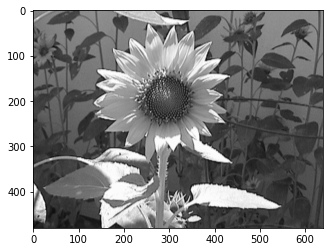

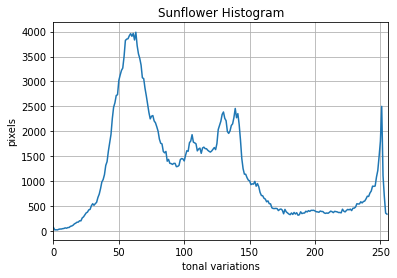

In [3]:
def get_histogram(img, norm=False, plot=False, title=''):
  bins = 256
  hist = np.zeros(bins)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      hist[img[i][j]] += 1
  
  if norm:
    hist /= (img.shape[0] * img.shape[1])

  if plot:
    plt.figure()
    plt.plot(hist)
    plt.xlim(0, bins)
    plt.title(f'{title} Histogram')
    plt.xlabel('tonal variations')
    plt.ylabel('pixels')
    plt.grid()

  return (hist, bins-1)

sunflower_gray_img = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(sunflower_gray_img, cmap='gray', vmin=0, vmax=255)
hist, bins = get_histogram(sunflower_gray_img, plot=True, title='Sunflower')

## Para que se usa la ecualización de un histograma ? Dar ejemplos

La ecualización de un histograma pretende realizar una transformación en la imagen que logre una distribución uniforme de pixeles para cada tonalidad de gris. El resultado de la ecualización maximiza el contraste sin perdida de información, aprovechando de una manera óptima el rango dinámico. Podemos ver en los siguientes ejemplos, como utilizando una función de ecualización de cv2, nos modifica el histograma buscando mayor uniformidad en la distribución y obtenemos un mayor contraste que en las imagenes originales.

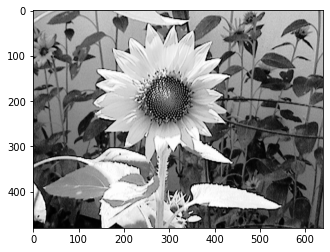

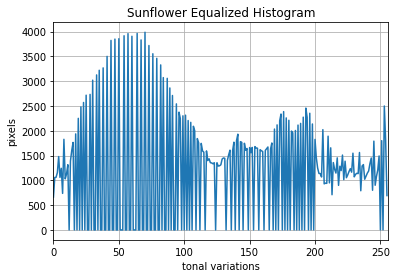

In [4]:
sunflower_eq = cv2.equalizeHist(sunflower_gray_img)
plt.imshow(sunflower_eq, cmap='gray', vmin=0, vmax=255)
hist, bins = get_histogram(sunflower_eq, plot=True, title='Sunflower Equalized')

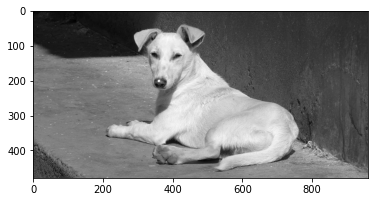

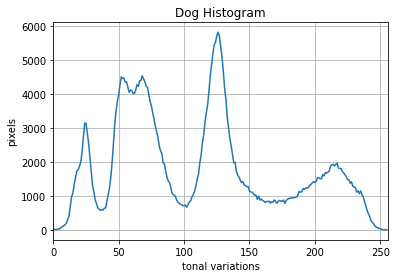

In [5]:
dog_img = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(dog_img, cmap='gray', vmin=0, vmax=255)
hist, bins = get_histogram(dog_img, plot=True, title='Dog')

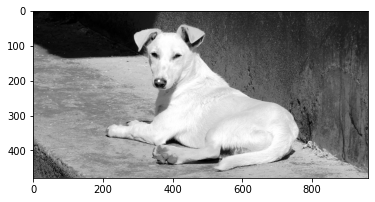

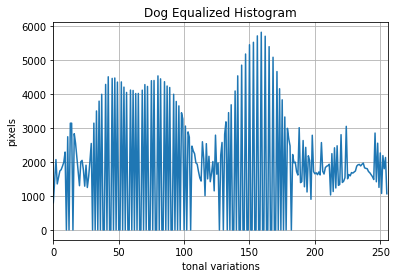

In [6]:
dog_eq = cv2.equalizeHist(dog_img)
plt.imshow(dog_eq, cmap='gray', vmin=0, vmax=255)
hist, bins = get_histogram(dog_eq, plot=True, title='Dog Equalized')